<a href="https://colab.research.google.com/github/deborammartins/Data_Analytics/blob/main/Machine_Learning_Classifica%C3%A7%C3%A3o_com_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import LinearSVC #estimador
from sklearn.svm import SVC #estimador
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt


#Classificação 1 - O animal é um cão ou um porco?

##Features

1 - Sim
0 - Não

Tem pelo longo?

Tem perna curta?

Faz "au au"?

In [ ]:
from re import X
pig1 = [0, 1, 0]
pig2 = [0, 1, 1]
pig3 = [1, 1, 0]

dog1 = [0, 1, 1]
dog2 = [1, 0, 1]
dog3 = [1, 1, 1]

# 1 => pig, 0=> dog
X_train = [pig1, pig2, pig3, dog1, dog2, dog3]
y_train = [1, 1, 1, 0, 0, 0] #labels

##Aprendizado Supervisionado

In [ ]:
#Aprendizado Supervisionado
model = LinearSVC()
#Ensinando o modelo oferecendo os dados e suas classes
model.fit(X_train, y_train)

LinearSVC()

##Classificando Animais

In [ ]:
animal_x = [1,1,1]
model.predict([animal_x]) #o método predict necessita de um array

array([0])

O modelo classificou o animal_x como um dog.

In [ ]:
animal_x2 = [1,1,1]
animal_x3 = [1,1,0]
animal_x4 = [0,1,1]

X_test = [animal_x2, animal_x3, animal_x4]
y_test = [0, 1, 1]

In [ ]:
previsoes = model.predict(X_test)

O algoritmo classificou o animal_x4 como um pig, mas era um dog. Vamos calcular a taxa de acertos.

##Taxa de Acertos

In [ ]:
#Comparando os arrays e somando os verdadeiros
corretos = (previsoes == y_test).sum()
total = len(X_test)
taxa_acerto = (corretos/total*100).round(2)
print(f'A taxa de acerto do modelo é {taxa_acerto}%.')

A taxa de acerto do modelo é 66.67%.


##Acurácia

In [ ]:
acuracia = accuracy_score(y_test, previsoes).round(2)
print(f'Acurácia do modelo: {acuracia*100}%')

Acurácia do modelo: 67.0%


#Classificação 2 - Acesso a Ecommerce e vendas

Os dados representam a quantidade de acessos que um E-commerce possui e quantos destes resultaram em conversão de vendas.

##Features

In [ ]:
dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv")
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


##Definindo Variáveis Independentes e Dependente

In [ ]:
#Variáveis Independentes
x = dados[['home', 'how_it_works', 'contact']]
#Variável Dependente
y = dados['bought']

##Separando dataset em dados de treino e teste

In [ ]:
dados.shape

(99, 4)

In [ ]:
print(f'25% de dados para teste: {99*0.25}')
print(f'75% de dados para treino: {99-24}')

25% de dados para teste: 24.75
75% de dados para treino: 75


In [ ]:
#75% de dados para treino
X_train = x[:75] #0 ao 74
y_train = y[:75]

In [ ]:
#25% de dados para teste
X_test = x[75:]
y_test = y[75:]

##Treinando o modelo e obtendo a Acurácia

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25) #separação aleatória
modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Acurácia do modelo: 96.00%


Para obtermos sempre o mesmo resultado, precisamos determinar uma semente.
Isso minimiza a variação de aleatoriedade.

In [ ]:
seed = 20
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.25) #separação aleatória
modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Acurácia do modelo: 96.00%


In [ ]:
y_test.value_counts()
#8 pessoas compraram

0    19
1     6
Name: bought, dtype: int64

In [ ]:
print(f'Conversão: {8/25*100}%')

Conversão: 32.0%


In [ ]:
y_train.value_counts()
#25 pessoas compraram

0    47
1    27
Name: bought, dtype: int64

In [ ]:
print(f'Conversão: {25/74*100 :.2f}%')

Conversão: 33.78%


#Classificação 3 - Web

Os dados representam uma plataforma de criação de sites em que os contratantes estipulam quantas horas serão necessárias para a criação do projeto e o quanto estão dispostos a pagar.

Objetivo: criar um modelo capaz de prever se a quantidade de horas estipuladas e o valor atribuído são plausíveis e se o projeto será finalizado ou não.


##Features

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv")

In [ ]:
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


1 = Sim

0 = Não

In [ ]:
change = {
    0 : 1,
    1 : 0
}
data['finished'] = data.unfinished.map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


##Gráficos

<Axes: xlabel='expected_hours', ylabel='price'>

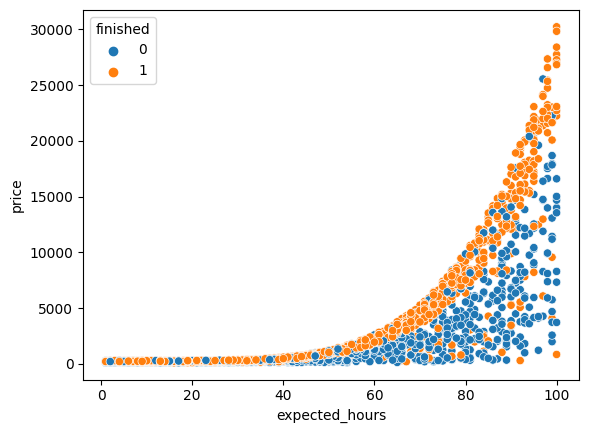

In [ ]:
ax = sns.scatterplot(x='expected_hours', y='price', hue="finished", data=data)
ax

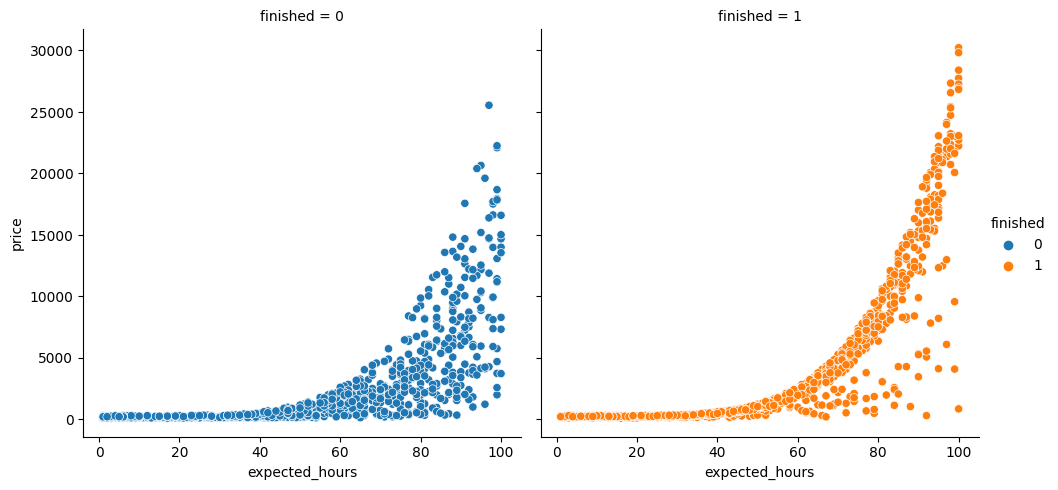

In [ ]:
ax = sns.relplot(x='expected_hours', y='price', hue="finished", col="finished", data=data)
ax

##Treinando o modelo

In [ ]:
X = data[['expected_hours', 'price']]
y = data['finished']

In [ ]:
#seed = 20
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed, test_size = 0.25, stratify=y) #separação aleatória

#print(f'Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

#modelo = LinearSVC(random_state=seed) #essa é uma forma de fixar a aleatoriedade
#modelo.fit(X_train, y_train)
#previsoes = modelo.predict(X_test)
#print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Outra forma de fixar a aleatoriedade

In [ ]:
seed = 20
np.random.seed(seed) #outra forma de fixar a aleatoriedade que vai ser atribuída a tudo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acurácia do modelo: 51.48%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##Algoritmo de baseline

Consiste em um algoritmo de base que considera que todos os elementos são positivos, ou seja, que os 540 elementos de teste foram finalizados.

In [ ]:
baseline = np.ones(540) #considerando todos como Sim
accuracy = accuracy_score(y_test, baseline) *100
print(f'Acurácia do modelo: {accuracy_score(y_test, baseline)*100 :.2f}%')

Acurácia do modelo: 52.59%


O baseline apresentou um desempenho muito próximo ao modelo, indicando que nosso modelo está distante do ideal.

##Gráfico dos dados de Teste

<Axes: xlabel='expected_hours', ylabel='price'>

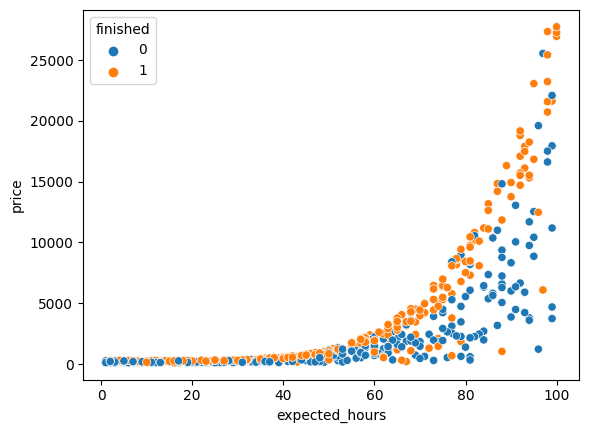

In [ ]:
ax = sns.scatterplot(x='expected_hours', y='price', hue=y_test, data=X_test)
ax

Utilizando os dados das variáveis independentes de teste, podemos observar que temos um padrão de valores da variável dependente.

##Gráfico de Previsões

In [ ]:
#Valores max e min dos eixos
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [ ]:
#Dividindo o eixo x em 100 partes
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
#Dividindo o eixo y em 100 partes
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y) #eixo x e y repetidos 100 vezes. Precisamos concatenar
pontos = np.c_[xx.ravel(), yy.ravel()] #concatenando cada ponto x com cada ponto y
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape) #redimensionando a matriz de acordo com o xx, tornando-a 100 x 100 ao invés de 10000 pontos
z.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(100, 100)

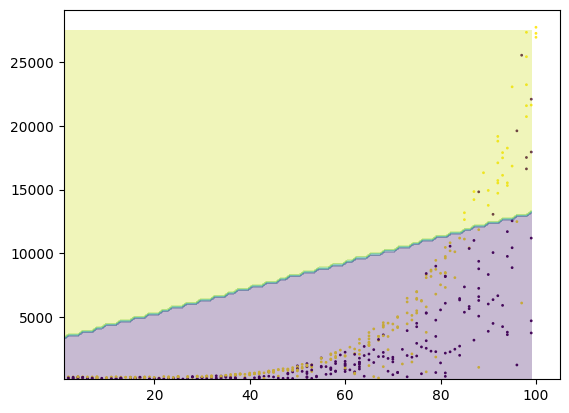

In [ ]:
ax = plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=1) #c = color, s = size
plt.contourf(xx, yy, z, alpha=0.3)

A curva de decisão está muito ruim e insatisfatória. Precisamos melhorar nosso modelo para que contemple dados não lineares.

##Support Vector Machine

In [ ]:
seed = 20
np.random.seed(seed) #outra forma de fixar a aleatoriedade que vai ser atribuída a tudo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo = SVC() #Suport Vector Machine
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acurácia do modelo: 53.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


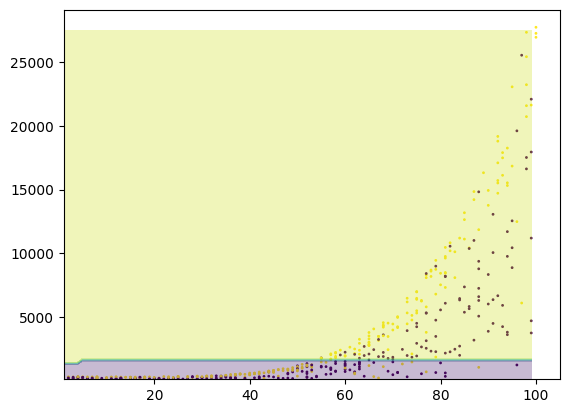

In [ ]:
#Valores max e min dos eixos
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()

#Dividindo o eixo x em 100 partes
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
#Dividindo o eixo y em 100 partes
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y) #eixo x e y repetidos 100 vezes. Precisamos concatenar
pontos = np.c_[xx.ravel(), yy.ravel()] #concatenando cada ponto x com cada ponto y

z = modelo.predict(pontos)
z = z.reshape(xx.shape) #redimensionando a matriz de acordo com o xx, tornando-a 100 x 100 ao invés de 10000 pontos

ax = plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=1) #c = color, s = size
plt.contourf(xx, yy, z, alpha=0.3)

Escalas distintas provocam alterações no algoritmo. Precisamos redimensionar e colocar eixo x e y na mesma escala.

## Standard Scaler - Escalador

Criando uma nova escala para o X_train e X_test

In [ ]:
seed = 20
np.random.seed(seed) #outra forma de fixar a aleatoriedade que vai ser atribuída a tudo
raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

print(f'Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

#Reconfigurando a escala das variáveis independentes
scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)


modelo = SVC() #Suport Vector Machine
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
Acurácia do modelo: 70.37%


Após reconfigurarmos a escala, as variáveis de expected_hours deixaram de ser um dataframe e se transformaram em um array de arrays. Precisamos criar novas variáveis para fatiar esse array.

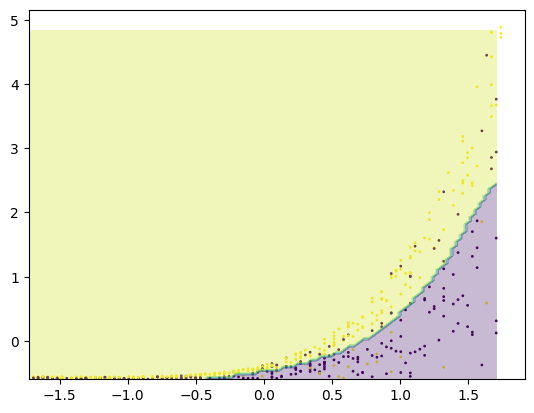

In [ ]:
data_x = X_test[:,0]
data_y = X_test[:,1]

#Valores max e min dos eixos
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

#Dividindo o eixo x em 100 partes
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/pixels)
#Dividindo o eixo y em 100 partes
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y) #eixo x e y repetidos 100 vezes. Precisamos concatenar
pontos = np.c_[xx.ravel(), yy.ravel()] #concatenando cada ponto x com cada ponto y

z = modelo.predict(pontos)
z = z.reshape(xx.shape) #redimensionando a matriz de acordo com o xx, tornando-a 100 x 100 ao invés de 10000 pontos

ax = plt.scatter(data_x, data_y, c=y_test, s=1) #c = color, s = size
plt.contourf(xx, yy, z, alpha=0.3)

Podemos concluir que nossos dados não se enquadram em análises lineares e que o redimensionamento da escala é fundamental para obtermos um modelo mais preciso.

#Classificação 4 - Preço de veículos

##Features

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv")

In [ ]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
X_car = data[['price', 'mileage_per_year', 'model_year']]
y_car = ['sold']

In [ ]:
seed = 5
np.random.seed(seed) #outra forma de fixar a aleatoriedade que vai ser atribuída a tudo
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.25, stratify=y)

print(f'Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

modelo = LinearSVC()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')

In [ ]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(X_train, y_train)
previsoes = dummy_stratified.predict(X_test)
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)*100 :.2f}%')